In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import healpy as hp

In [2]:
names = ['fieldRA', 'fieldDec', 'rotSkyPos', 'expMJD']
types = [float]*4
npts = 180
data = np.zeros(npts, dtype=zip(names,types))
data['rotSkyPos'] = np.arange(0,npts*2,2)
deltaMJD = 34.*npts/3600./24.
expMJD_0 = 57000.
data['expMJD'] = expMJD_0+np.arange(0,deltaMJD, 34./3600./24.)

In [3]:
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
nside = 1024
metric = metrics.CountMetric(col='fieldRA')
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, useCache=False)
bundle = metricBundles.MetricBundle(metric,slicer,'')

Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes


In [5]:
bg = metricBundles.MetricBundleGroup({1:bundle},None,  outDir=outDir, resultsDb=resultsDb)
bg.setCurrent('')
bg.runCurrent('',simData=data)

Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


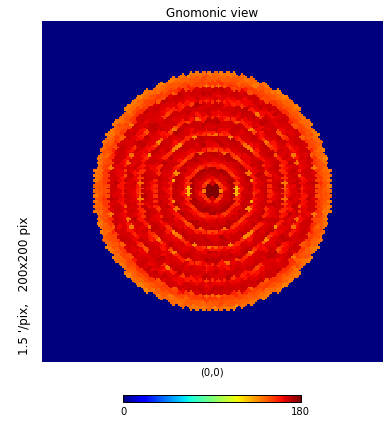

In [6]:
hp.gnomview(bundle.metricValues.data)

In [10]:
print 'fill factor = %f' % (bundle.metricValues.mean()/bundle.metricValues.max())

fill factor = 0.888010
